### Testing Relative Positions

In [85]:
import numpy as np

def calculate_relative_position_labels(ground_truth_labels, silence=0):
    """
    Creates a new list, which labels each timebin's relative position within each phrase.

    Args:
        ground_truth_labels (List[int]): The list of integer values representing timebin syllable labels.
        silence (int): The label representing silence, used to separate phrases.

    Returns:
        relative_position_labels (List[float]): List of float values between 0-1 representing the position of the timebin within each phrase.
    """

    labels_array = np.array(ground_truth_labels)
    relative_positions = np.zeros_like(labels_array, dtype=float)

    # get first syllable that is not a silence
    current_syllable = labels_array[np.where(labels_array != 0)]
    current_syllable = current_syllable[0]

    start_of_phrase_index = 0 
    end_of_phrase_index = 0 
    phrases = []

    for i, value in enumerate(labels_array):
        # Check if it's the end of the array or the next element is silence
        if i < (len(labels_array)-1):
            if labels_array[i+1] != silence and labels_array[i+1] != current_syllable:
                # Phrase ends
                end_of_phrase_index = i
                # Calculate phrase size
                phrase_size = end_of_phrase_index - start_of_phrase_index + 1
                # Create a numpy array with uniformly increasing floats between 0 and 1
                phrase_array = np.linspace(0, 1, phrase_size)
                phrases.append(phrase_array)
                # Update start_of_phrase_index for the next phrase
                start_of_phrase_index = i + 1
                current_syllable = labels_array[i+1]
                

    phrases = np.concatenate(phrases)
    relative_positions[:phrases.shape[0]] = phrases
    
    return relative_positions.tolist()


In [86]:
# Example usage
ground_truth_labels = [0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 3]
# 6
# 5
# 1 

relative_position_labels = calculate_relative_position_labels(ground_truth_labels)
print(relative_position_labels)

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 0.0, 0.25, 0.5, 0.75, 1.0, 0.0]


In [1]:
import torch
print(torch.cuda.is_available())


True


## Testing HDBSCAN

In [2]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


In [3]:
import hdbscan

# Initialize HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

# Fit model
clusterer.fit(X)


HDBSCAN(gen_min_span_tree=True)

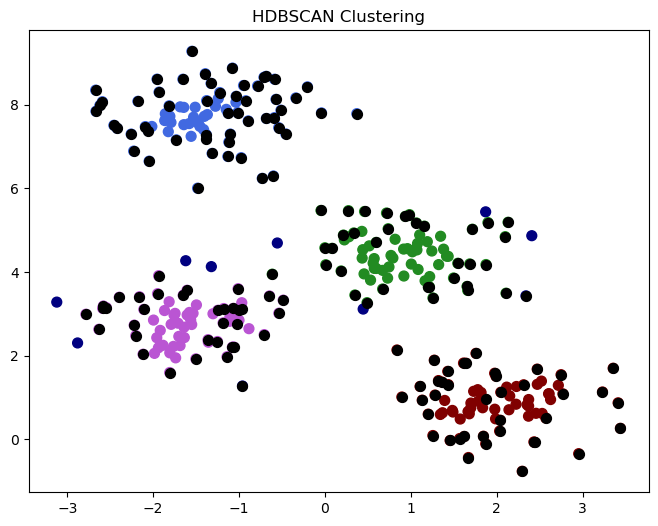

In [4]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], s=50, color=vectorizer(clusterer.labels_))

# Plot the outliers
outliers = clusterer.outlier_scores_ > 0.2
plt.scatter(X[outliers, 0], X[outliers, 1], s=50, color='k')

plt.title('HDBSCAN Clustering')
plt.show()
